In this notebook we analize game items:
- how many games there are
- how many games with more than 10000 votes there are
- what are the possible categories, mechanics, game types and designers of games and what are their distributions

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 100)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [49]:
df = pd.read_json('../bgg_GameItem.jl', lines = True)

In [10]:
print(len(df))
df.columns

100109


Index(['add_rank', 'alt_name', 'artist', 'avg_rating', 'bayes_rating',
       'best_rating', 'bgg_id', 'category', 'compilation', 'complexity',
       'cooperative', 'description', 'designer', 'easiest_complexity',
       'family', 'game_type', 'hardest_complexity',
       'highest_language_dependency', 'image_file', 'image_url',
       'language_dependency', 'lowest_language_dependency', 'max_players',
       'max_players_best', 'max_players_rec', 'max_time', 'mechanic',
       'min_age', 'min_age_rec', 'min_players', 'min_players_best',
       'min_players_rec', 'min_time', 'name', 'num_votes', 'publisher', 'rank',
       'stddev_rating', 'url', 'video_url', 'worst_rating', 'year',
       'implementation', 'expansion', 'integration', 'compilation_of'],
      dtype='object')

In [12]:
len(df.loc[df['num_votes'] > 10000])

322

In [50]:
df['mechanic']

0         [Alliances:2916, Area Majority / Influence:208...
1                                       [Trick-taking:2009]
2         [Area Majority / Influence:2080, Hand Manageme...
3         [Action Points:2001, Area Majority / Influence...
4         [Hand Management:2040, Investment:2910, Market...
                                ...                        
100104    [Area Majority / Influence:2080, Set Collectio...
100105                                                  NaN
100106                                     [Real-Time:2831]
100107    [Card Drafting:2041, Hand Management:2040, Pat...
100108    [Constrained Bidding:2922, Pattern Building:20...
Name: mechanic, Length: 100109, dtype: object

In [9]:
df['category']

0         [Economic:1021, Negotiation:1026, Political:1001]
1                            [Card Game:1002, Fantasy:1010]
2                   [Abstract Strategy:1009, Medieval:1035]
3                                            [Ancient:1050]
4                  [Economic:1021, Territory Building:1086]
                                ...                        
100104               [Educational:1094, Environmental:1084]
100105                                     [Card Game:1002]
100106                            [Action / Dexterity:1032]
100107                                        [Travel:1097]
100108                [Abstract Strategy:1009, Number:1098]
Name: category, Length: 100109, dtype: object

In [10]:
df['game_type']

0         [Strategy Game:5497]
1         [Strategy Game:5497]
2         [Strategy Game:5497]
3                          NaN
4         [Strategy Game:5497]
                  ...         
100104                     NaN
100105                     NaN
100106                     NaN
100107                     NaN
100108                     NaN
Name: game_type, Length: 100109, dtype: object

In [51]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

df_mechanics = df.loc[df['mechanic'].notna()]
mechanics = to_1D(df_mechanics['mechanic']).value_counts()
df_categories = df.loc[df['category'].notna()]
categories = to_1D(df_categories['category']).value_counts()
df_types = df.loc[df['game_type'].notna()]
types = to_1D(df_types['game_type']).value_counts()
df_designers = df.loc[df['designer'].notna()]
designers = to_1D(df_designers['designer']).value_counts()

In [12]:
len(df.loc[df['mechanic'].isna()])

15461

In [8]:
print(mechanics.head(100))

Dice Rolling:2072                                22531
Roll / Spin and Move:2035                        15412
Hand Management:2040                             12015
Set Collection:2004                              11424
Card Drafting:2041                                6641
Hexagon Grid:2026                                 6344
Simulation:2070                                   6280
Variable Player Powers:2015                       5994
Tile Placement:2002                               5394
Cooperative Game:2023                             4905
Memory:2047                                       4789
Point to Point Movement:2078                      4279
Grid Movement:2676                                4213
Modular Board:2011                                3985
Area Majority / Influence:2080                    3931
Auction/Bidding:2012                              3905
Trading:2008                                      3532
Area Movement:2046                                3427
Simultaneo

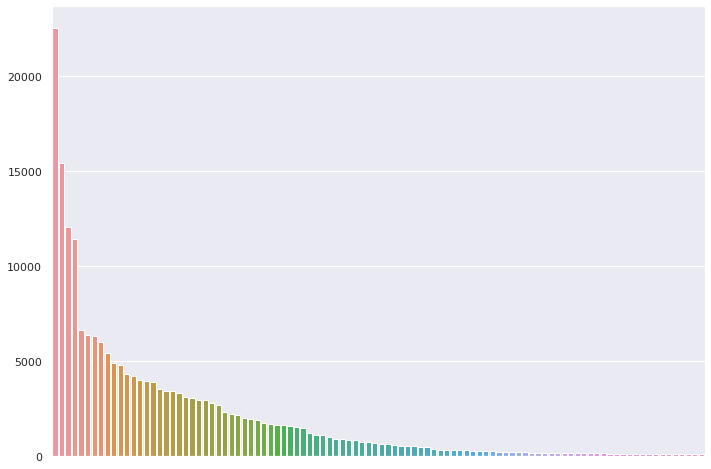

In [18]:
sns.barplot(x = mechanics[:100].index, y = mechanics[:100].values).set(xticklabels=[])
pass

In [14]:
len(df.loc[df['category'].isna()])

0

In [39]:
print(categories.head(100))

0                   Economic:1021
1                Negotiation:1026
2                  Political:1001
3                  Card Game:1002
4                    Fantasy:1010
5          Abstract Strategy:1009
6                   Medieval:1035
7                    Ancient:1050
8                   Economic:1021
9         Territory Building:1086
10              Civilization:1015
11                  Nautical:1008
12         Abstract Strategy:1009
13              Civilization:1015
14                   Fantasy:1010
15               Exploration:1020
16                   Fantasy:1010
17                    Travel:1097
18                 Card Game:1002
19                   Farming:1013
20               Negotiation:1026
21                   Ancient:1050
22                 Mythology:1082
23                  Economic:1021
24               Negotiation:1026
25               Negotiation:1026
26                  Bluffing:1023
27               Negotiation:1026
28           Science Fiction:1016
29            

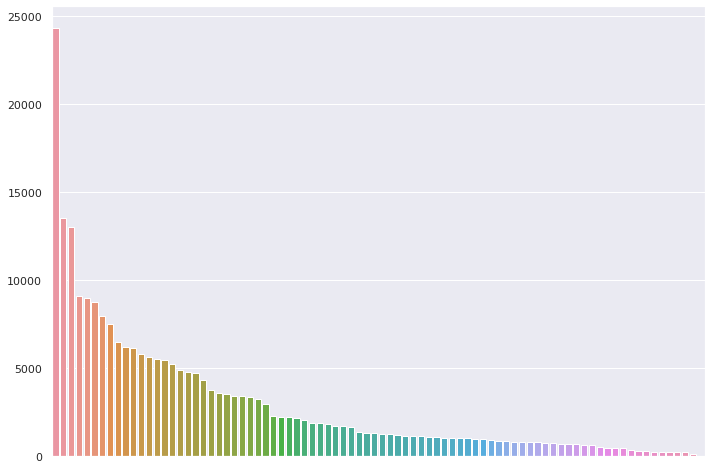

In [22]:
sns.barplot(x = categories.index, y = categories.values).set(xticklabels=[])
pass

In [23]:
len(df.loc[df['game_type'].isna()])

78396

In [24]:
print(types.head(100))

War Game:4664           7855
Abstract Game:4666      4601
Children's Game:4665    4007
Family Game:5499        2336
Strategy Game:5497      2275
Thematic:5496           1214
Party Game:5498          625
Customizable:4667        525
Commodore 64:4420          1
Amiga:4415                 1
Atari ST:4976              1
Arcade:4781                1
dtype: int64


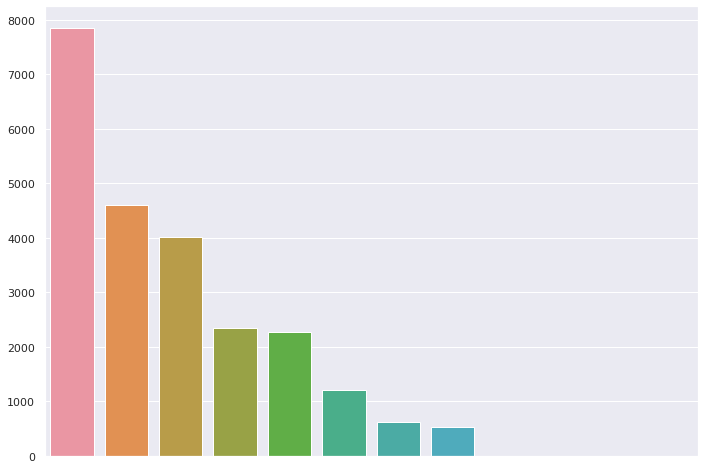

In [25]:
sns.barplot(x = types.index, y = types.values).set(xticklabels=[])
pass

In [16]:
len(df.loc[df['designer'].isna()])

0

In [15]:
print(designers.head(100))

(Uncredited):3                     18749
Lloyd Krassner:810                   905
Reiner Knizia:2                      582
Charles Darrow:1268                  262
Joseph Miranda:337                   238
Wolfgang Kramer:7                    222
Paul Rohrbaugh:812                   189
James Ernest:61                      184
Richard H. Berg:135                  164
Heinz Meister:256                    164
Perry Moore:1257                     143
Ty Bomba:1747                        142
Michael Rüttinger:581                136
Sid Sackson:4                        132
Garrett J. Donner:315                129
Michael Schacht:86                   129
Reinhold Wittig:94                   129
Michael S. Steer:1050                128
Kai Haferkamp:645                    126
Markus Brand:6941                    124
Inka Brand:6940                      124
Alex Randolph:24                     122
Jim Deacove:1121                     119
Néstor Romeral Andrés:9393           117
Jim Dunnigan:108